Предметная область: образ жизни студентов  
Источник данных: https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset  
Характер данных: Реальные  

Атрибуты датасета:
- Student_ID (int64)
- Study_Hours_Per_Day (float64)
- Extracurricular_Hours_Per_Day (Часы внеучебной деятельнсти) (float64)
- Sleep_Hours_Per_Day (float64)
- Social_Hours_Per_Day (float64)
- Physical_Activity_Hours_Per_Day (float64)
- Stress_Level (object)
- GPA (Средний балл) (float64)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score
)

In [14]:
df = pd.read_csv(r'data/student_lifestyle_clean.csv')
df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32,1
1996,6.3,2.8,8.8,1.5,4.6,2.65,1
1997,6.2,0.0,6.2,0.8,10.8,3.14,1
1998,8.1,0.7,7.6,3.5,4.1,3.04,2


В данном наборе целевой меткой является уровень стресса.

Посмотрим на распределение целевой метки: 

Распределение классов для Stress_Level
2    1029
1     674
0     297
Name: count, dtype: int64


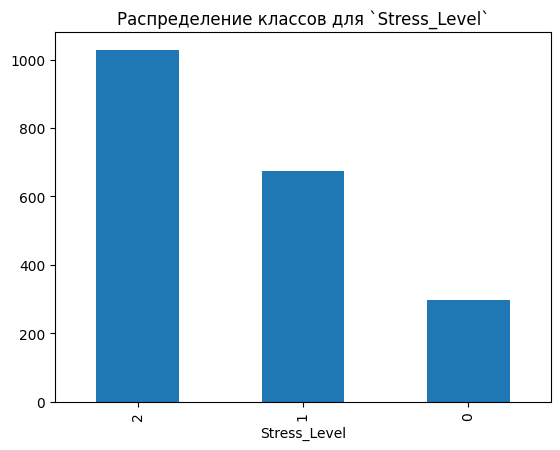

In [15]:
target = 'Stress_Level'

class_counts = df[target].value_counts()
print(f'Распределение классов для {class_counts}')
class_counts.plot(kind='bar', title=f'Распределение классов для `{target}`')
plt.show()

Целевой класс не сбалансирован. Классифицируем три набора данных:
1. Исходный
2. Сведем число примеров каждого класса к 674 (stress_level=1) путем оверсемлинга методом SMOTE для класса 0 и андерсемплинга класса 2
3. Сведем число примеров каждого класса к максимуму с помощью метода SMOTE 

In [16]:
# DF 2
smote = SMOTE(sampling_strategy={0: 674}, random_state=0)
x_smote, y_smote = smote.fit_resample(df.drop(target, axis=1), df[target])
smote_df = pd.DataFrame(x_smote, columns=df.drop(target, axis=1).columns)
smote_df[target] = y_smote
df2 = pd.concat([
    df[df[target] == 2].sample(n=674, random_state=0),
    df[df[target] == 1],
    smote_df[smote_df[target] == 0]
])
print('Shape:', df2.shape)
print('Target counts:', df2[target].value_counts())
df2.sample(10)

Shape: (2022, 7)
Target counts: Stress_Level
2    674
1    674
0    674
Name: count, dtype: int64


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
439,7.500000,3.500000,7.500000,3.900000,1.600000,2.970000,1
682,7.300000,2.900000,7.900000,3.900000,2.000000,3.190000,1
2233,5.261719,2.108596,9.376562,3.091404,4.161719,2.842968,0
1483,7.300000,0.100000,9.400000,0.100000,7.100000,3.290000,1
734,9.100000,1.500000,7.300000,1.800000,4.300000,3.400000,2
1322,9.700000,1.900000,6.600000,4.400000,1.400000,3.060000,2
1117,5.700000,0.000000,5.100000,3.500000,9.700000,2.750000,2
1291,7.100000,1.100000,8.700000,2.700000,4.400000,3.150000,1
2207,5.054487,1.972756,7.290706,1.054807,8.627244,2.677276,0
1132,5.400000,1.300000,6.200000,5.900000,5.200000,3.100000,0


In [17]:
# DF 3
smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(df.drop(target, axis=1), df[target])
df3 = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote, columns=[target])], axis=1)
print('Shape:', df3.shape)
print('Target counts:', df3[target].value_counts())
df2.sample(10)

Shape: (3087, 7)
Target counts: Stress_Level
1    1029
0    1029
2    1029
Name: count, dtype: int64


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
775,9.700000,2.800000,9.100000,1.300000,1.100000,3.540000,2
1709,8.200000,2.200000,5.100000,4.200000,4.300000,3.480000,2
1683,7.200000,0.200000,9.600000,2.800000,4.200000,3.190000,1
809,6.800000,2.600000,7.300000,1.100000,6.200000,3.130000,1
826,9.000000,3.800000,5.100000,5.900000,0.200000,3.220000,2
2305,5.300000,2.275341,7.288353,4.998636,4.137671,2.655142,0
982,7.900000,0.500000,7.900000,4.600000,3.100000,3.380000,1
779,8.000000,2.400000,8.400000,3.000000,2.200000,2.960000,1
2222,5.250153,3.375076,9.824924,1.250459,4.299388,2.557416,0
2263,5.159015,1.920492,7.656553,0.584431,8.679508,2.672049,0


In [18]:
def show_metrics(y_true, y_pred, proba):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 3)
    roc = round(roc_auc_score(y_true, proba, multi_class='ovo'), 3)
    
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC'],
        'Score': [accuracy, precision, recall, f1, roc]
    })
    print(metrics_df.to_string(index=False))

    sns.heatmap(cm, annot=True, cbar=False, fmt='d')
    plt.xlabel('Predict')
    plt.ylabel('Actual')
    plt.show()    

In [19]:
def get_k(x_train, y_train, x_test, y_test, k_lim):
    scores = []
    for k in range(1, k_lim + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        knn_pred = knn.predict(x_test)
        score = accuracy_score(y_test, knn_pred)
        scores.append(score)
    
    # Отображение локтя
    plt.plot(range(1, k_lim + 1), scores, marker='o')
    plt.xticks(range(1, k_lim + 1))
    plt.xlabel('k')
    plt.ylabel('acc')
    plt.show()
    
    return scores.index(max(scores)) + 1

In [20]:
def get_knn_model(dataframe, target_name, k_lim):
    x_train, x_test, y_train, y_test = train_test_split(
        dataframe.drop(target_name, axis=1),
        dataframe[target_name], test_size=0.2, random_state=0
    )
    k = get_k(x_train, y_train, x_test, y_test, k_lim)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    
    print('KNN results with k =', k)
    show_metrics(y_test, knn_pred, knn.predict_proba(x_test))
    
    return knn

kNN для несбалансированного фрейма


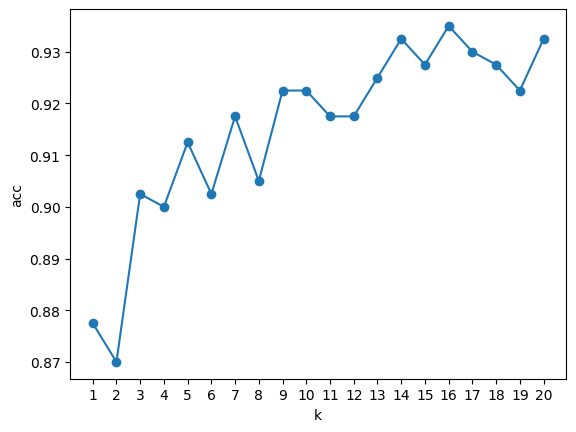

KNN results with k = 16
   Metric  Score
 Accuracy  0.935
Precision  0.935
   Recall  0.935
       F1  0.935
      ROC  0.986


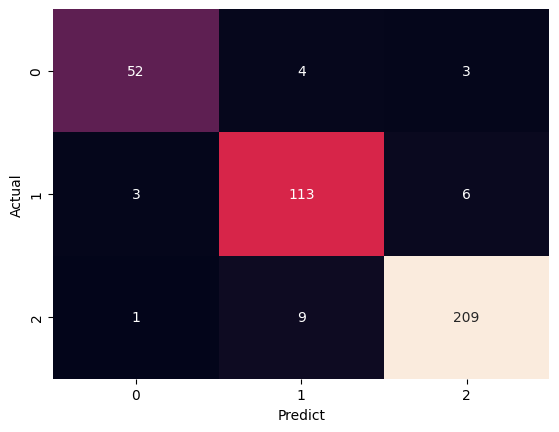

kNN для первого способа балансировки


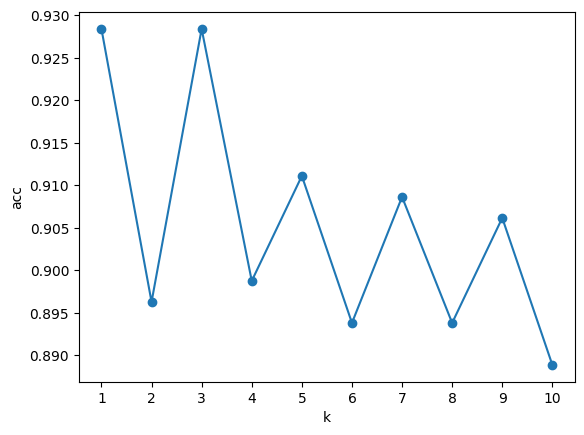

KNN results with k = 1
   Metric  Score
 Accuracy  0.928
Precision  0.933
   Recall  0.928
       F1  0.928
      ROC  0.948


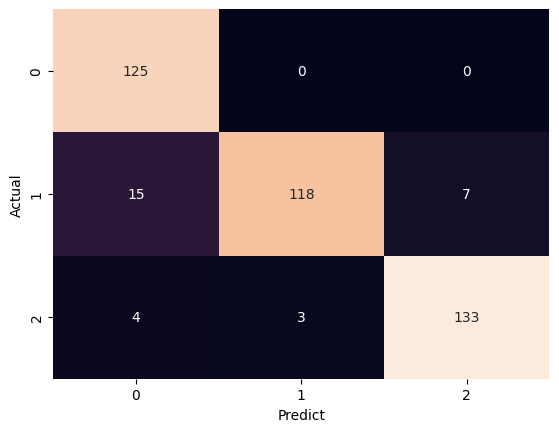

kNN для второго способа балансировки


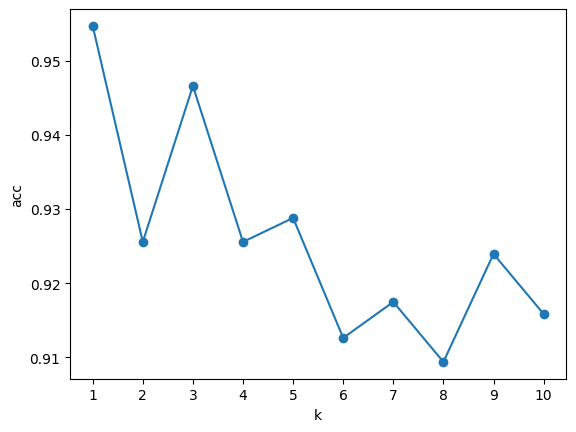

KNN results with k = 1
   Metric  Score
 Accuracy  0.955
Precision  0.955
   Recall  0.955
       F1  0.954
      ROC  0.968


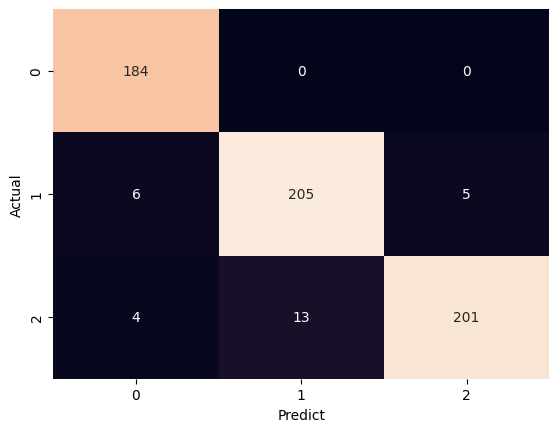

In [21]:
print('kNN для несбалансированного фрейма')
get_knn_model(df, target, k_lim=20)
print('kNN для первого способа балансировки')
get_knn_model(df2, target, k_lim=10)
print('kNN для второго способа балансировки')
get_knn_model(df3, target, k_lim=10)
print()

In [22]:
def get_dt_model(dataframe, target_name):
    x_train, x_test, y_train, y_test = train_test_split(
        dataframe.drop(target_name, axis=1),
        dataframe[target_name], test_size=0.2, random_state=0
    )
    dt = DecisionTreeClassifier(max_depth=3, random_state=0)
    dt.fit(x_train, y_train)
    dt_pred = dt.predict(x_test)
    
    show_metrics(y_test, dt_pred, dt.predict_proba(x_test))
    
    return dt

dt для несбалансированного фрейма
   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
       F1    1.0
      ROC    1.0


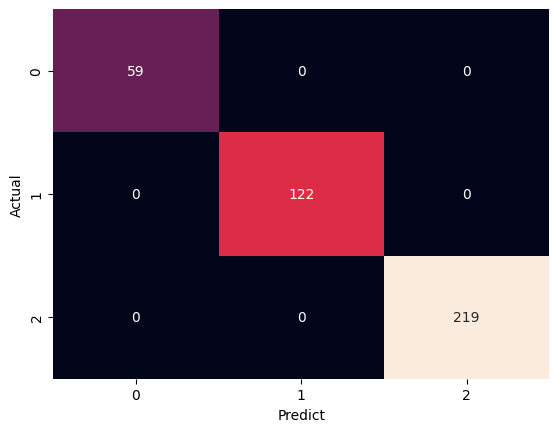

dt для первого способа балансировки
   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
       F1    1.0
      ROC    1.0


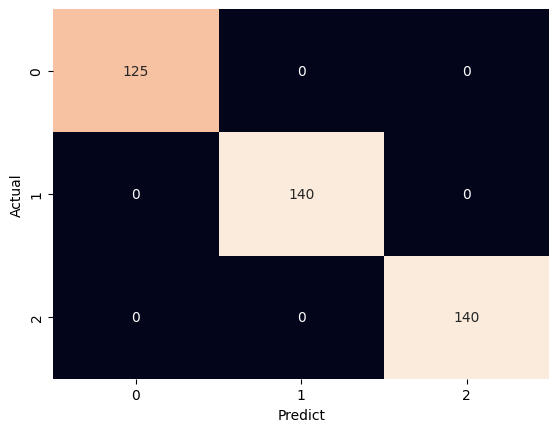

dt для второго способа балансировки
   Metric  Score
 Accuracy    1.0
Precision    1.0
   Recall    1.0
       F1    1.0
      ROC    1.0


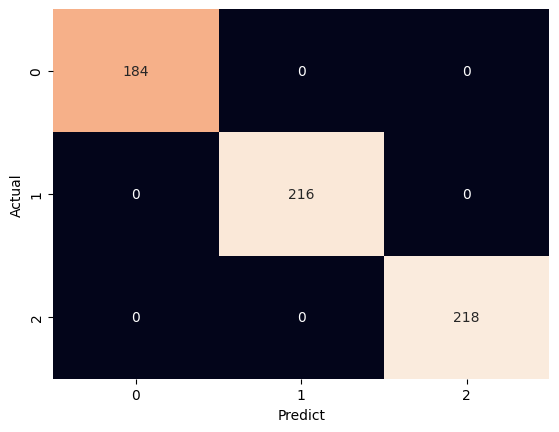

In [23]:
print('dt для несбалансированного фрейма')
get_dt_model(df, target)
print('dt для первого способа балансировки')
get_dt_model(df2, target)
print('dt для второго способа балансировки')
get_dt_model(df3, target)
print()

Во второй работе можно было заметить очень явное распределение на категории и сильную зависимость Stress_level от 2-3 параметров. Поэтому можно наблюдать 100% точность дерева решений при максимальной глубине 3 (при срезе глубины до 2-х, точность снижается до 0.8-0.9 в зависимости от балансировки).

В экспериментах с методом kNN можно выделить некоторые наблюдения:
1. Четкое распределение классов привело к достаточно высокой (0.93) точности без балансировки, но для достижения такой точности пришлось рассматривать 16 ближайших соседей
2. Оба метода балансировки позволили достигнуть наилучшей точности при проверке одного ближайшего соседа, что может быть полезно для оптимизации на больших данных.
3. Наилучшая точность kNN (0.96) достигнута в третьем наборе данных, в котором метод оверсемплинга SMOTE был применен ко всем классам.
